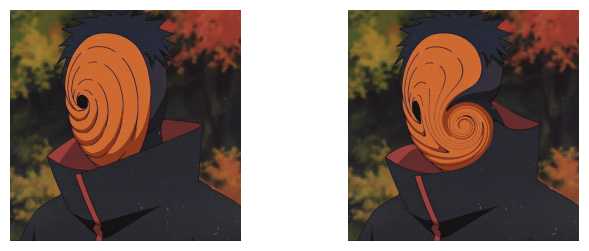

In [5]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import swirl

image_url = "https://i.pinimg.com/originals/8d/92/80/8d9280716e2b20fb1b43c43b2c03178d.jpg"
image = io.imread(image_url)

swirled = swirl(image, rotation=0, strength=20, radius=320)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)
ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')
plt.show()

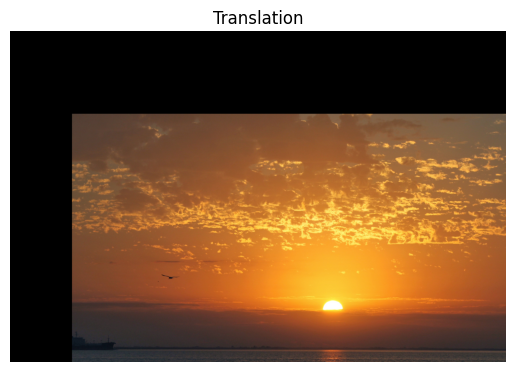

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import urllib

image_url = "https://pixy.org/src/477/4774988.jpg"
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv.imdecode(arr, -1)

h, w = image.shape[:2]
half_height, half_width = h // 4, w // 8
transition_matrix = np.float32([[1, 0, half_width], [0, 1, half_height]])
img_transition = cv.warpAffine(image, transition_matrix, (w, h))

plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.axis('off')
plt.show()

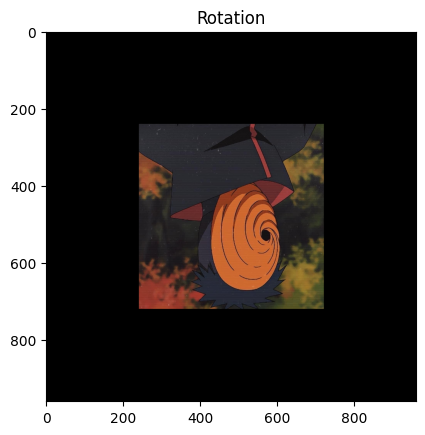

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import urllib

image_url = "https://i.pinimg.com/originals/8d/92/80/8d9280716e2b20fb1b43c43b2c03178d.jpg"

req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv.imdecode(arr, cv.IMREAD_COLOR)

h, w = image.shape[:2]
rotation_matrix = cv.getRotationMatrix2D((w/2, h/2), -180, 0.5)
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

In [1]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 51.8 MB/s eta 0:00:00


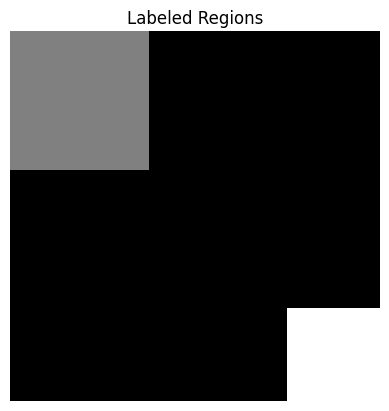

In [4]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

regions = np.zeros((8, 8), bool)
regions[:3, :3] = 1
regions[6:, 6:] = 1

labeled = measure.label(regions)

plt.imshow(labeled, cmap='gray', interpolation='nearest')
plt.title('Labeled Regions')
plt.axis('off')
plt.show()

In [6]:
from scipy import ndimage

In [7]:
sizes = ndimage.labeled_comprehension(regions, labeled, np.arange(1, labeled.max() + 1), np.sum, int, 0)
print('Background size:', sizes[0])
print('Size of first region:', sizes[1])

Background size: 9
Size of first region: 4


In [10]:
array = np.random.random_sample(regions.shape)
sums = ndimage.sum(array, labeled, range(1, labeled.max() + 1))

print('Sum of first region:', sums[1])

Background size: 9
Size of first region: 4
Sum of first region: 1.4450325739888972


Skala interpolsi miring

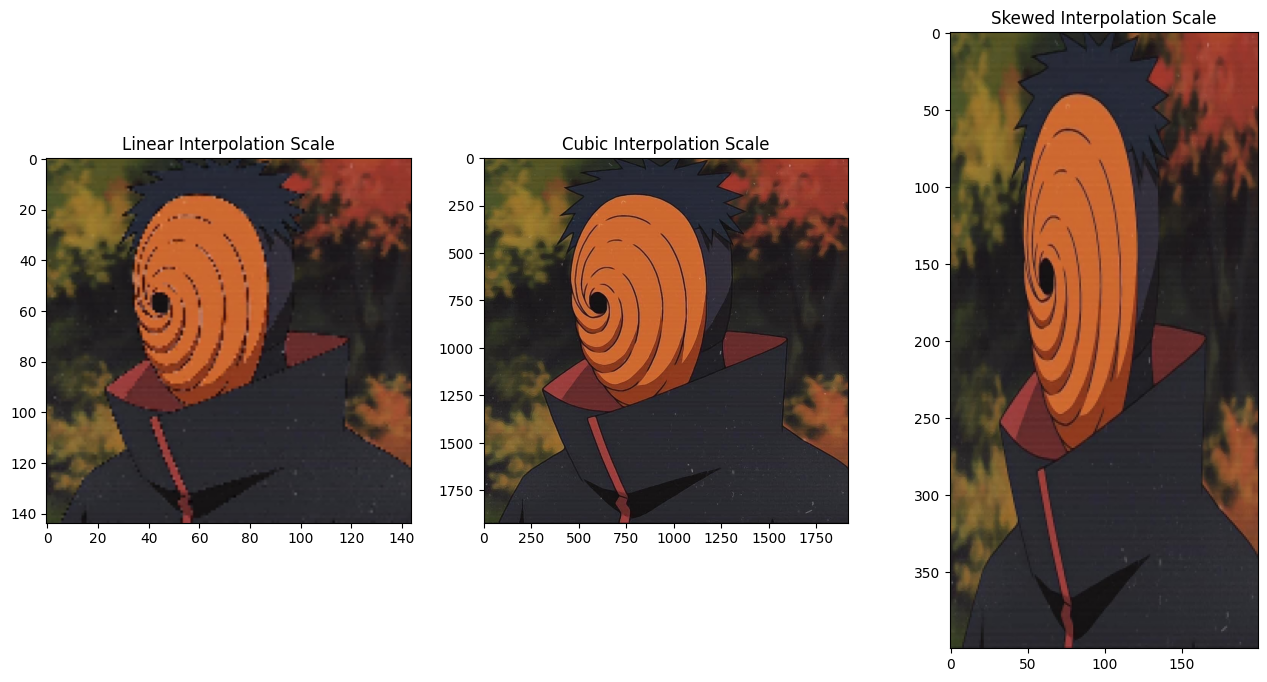

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Mengambil gambar dari URL
url = "https://i.pinimg.com/originals/8d/92/80/8d9280716e2b20fb1b43c43b2c03178d.jpg"
response = requests.get(url)
image = cv.imdecode(np.asarray(bytearray(response.content), dtype="uint8"), cv.IMREAD_COLOR)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
# image size being 0.15 times of its original size
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

# image size being 2 times of its original size
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

# image size being 0.15 times of its original size
image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale")

plt.show()